In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\satellite_health_dataset_corrected.csv")
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Battery Health Status,Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),...,Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1)
0,2025-01-01 00:00:00,3.749671,3.015297,87.809204,Good,17.200357,8.035426,94.512100,39.369751,30.478707,...,0.035491,0,0,97.375784,153.025098,107.645491,0,0,0,0
1,2025-01-01 00:01:00,3.686174,1.922323,79.528858,Degraded,21.095646,4.851902,89.216677,41.797481,24.669419,...,0.038446,0,0,97.110625,18.814218,313.180723,0,0,0,0
2,2025-01-01 00:02:00,3.764769,2.787719,73.352322,Good,19.758475,3.268242,94.188736,56.832299,22.817968,...,0.045371,0,0,95.398500,-128.872662,443.748479,0,0,0,0
3,2025-01-01 00:03:00,3.852303,2.190381,73.056809,Good,19.433472,5.515039,84.462197,54.178992,23.917985,...,0.014337,0,0,90.574458,-163.572864,373.248039,0,0,0,0
4,2025-01-01 00:04:00,3.676585,2.336299,78.286746,Good,21.535138,4.936259,91.153286,54.224583,29.319132,...,0.025834,0,0,96.973660,23.500602,349.425328,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-03-11 10:35:00,3.677478,1.867726,77.838428,Good,18.891088,6.333620,94.738203,51.106418,24.523247,...,0.021296,0,0,97.889141,-16.405325,96.374918,0,0,0,0
99996,2025-03-11 10:36:00,3.643022,2.782827,76.562670,Good,15.367237,4.890244,83.554206,42.158485,23.813063,...,0.025370,0,0,96.083692,-110.137690,431.631946,0,1,0,0
99997,2025-03-11 10:37:00,3.740919,2.580010,76.601809,Good,21.663112,4.756305,86.555786,48.505267,23.621312,...,0.025444,0,0,85.776354,-84.390957,435.774131,0,0,0,0
99998,2025-03-11 10:38:00,3.678891,2.927837,74.639541,Good,20.925061,4.202540,86.374568,49.112508,26.865771,...,0.046437,0,0,94.657834,-37.927439,100.500983,0,0,0,1


In [12]:
df.info('Dtype'=='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 46 entries, Timestamp to Payload Failures (0/1)
dtypes: float64(32), int64(8), object(6)
memory usage: 35.1+ MB


In [14]:
d = [i for i in df.columns if '(0/1)' in i]

In [15]:
d

['Error Flags (0/1)',
 'Redundant Sensor Discrepancies (0/1)',
 'Thruster Malfunctions (0/1)',
 'Power System Anomalies (0/1)',
 'Thermal System Anomalies (0/1)',
 'AOCS Faults (0/1)',
 'Payload Failures (0/1)']

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop non-numeric and anomaly indicator columns
# anomaly_columns = [col for col in df.columns if "(0/1)" in col]
categorical_columns = ["Battery Health Status","Antenna Status",'Battery Health Status','Spectral Sensor Health','Health Status','Event Logs']
timestamp_column = "Timestamp"

# Select only numerical telemetry data (excluding anomaly indicators and categorical columns)
numeric_features = df.drop(columns=[timestamp_column] + categorical_columns)

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
df["Anomaly_Score"] = iso_forest.fit_predict(scaled_data)

# Mark anomalies (-1 means anomaly, 1 means normal)
df["Anomaly_Detected"] = np.where(df["Anomaly_Score"] == -1, 1, 0)

# Count detected anomalies
df["Anomaly_Detected"].value_counts()


Anomaly_Detected
0    95000
1     5000
Name: count, dtype: int64

In [24]:
# Identify non-numeric columns in the selected features
non_numeric_columns = numeric_features.select_dtypes(exclude=["number"]).columns.tolist()
non_numeric_columns


[]

In [25]:
# Drop non-numeric columns from numeric features
numeric_features = numeric_features.drop(columns=non_numeric_columns)

# Normalize data
scaled_data = scaler.fit_transform(numeric_features)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
df["Anomaly_Score"] = iso_forest.fit_predict(scaled_data)

# Mark anomalies (-1 means anomaly, 1 means normal)
df["Anomaly_Detected"] = np.where(df["Anomaly_Score"] == -1, 1, 0)

# Count detected anomalies
df["Anomaly_Detected"].value_counts()


Anomaly_Detected
0    95000
1     5000
Name: count, dtype: int64

In [22]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Battery Health Status,Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),...,Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly_Score,Anomaly_Detected
0,2025-01-01 00:00:00,3.749671,3.015297,87.809204,Good,17.200357,8.035426,94.512100,39.369751,30.478707,...,0,97.375784,153.025098,107.645491,0,0,0,0,1,0
1,2025-01-01 00:01:00,3.686174,1.922323,79.528858,Degraded,21.095646,4.851902,89.216677,41.797481,24.669419,...,0,97.110625,18.814218,313.180723,0,0,0,0,1,0
2,2025-01-01 00:02:00,3.764769,2.787719,73.352322,Good,19.758475,3.268242,94.188736,56.832299,22.817968,...,0,95.398500,-128.872662,443.748479,0,0,0,0,1,0
3,2025-01-01 00:03:00,3.852303,2.190381,73.056809,Good,19.433472,5.515039,84.462197,54.178992,23.917985,...,0,90.574458,-163.572864,373.248039,0,0,0,0,1,0
4,2025-01-01 00:04:00,3.676585,2.336299,78.286746,Good,21.535138,4.936259,91.153286,54.224583,29.319132,...,0,96.973660,23.500602,349.425328,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-03-11 10:35:00,3.677478,1.867726,77.838428,Good,18.891088,6.333620,94.738203,51.106418,24.523247,...,0,97.889141,-16.405325,96.374918,0,0,0,0,1,0
99996,2025-03-11 10:36:00,3.643022,2.782827,76.562670,Good,15.367237,4.890244,83.554206,42.158485,23.813063,...,0,96.083692,-110.137690,431.631946,0,1,0,0,1,0
99997,2025-03-11 10:37:00,3.740919,2.580010,76.601809,Good,21.663112,4.756305,86.555786,48.505267,23.621312,...,0,85.776354,-84.390957,435.774131,0,0,0,0,1,0
99998,2025-03-11 10:38:00,3.678891,2.927837,74.639541,Good,20.925061,4.202540,86.374568,49.112508,26.865771,...,0,94.657834,-37.927439,100.500983,0,0,0,1,1,0


In [29]:
# Predict outliers
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
y = df['Anomaly_Detected']
scores_prediction = iso_forest.decision_function(numeric_features)
y_pred = iso_forest.predict(numeric_features)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
# Print the accuracy in separating outliers or anomalies
print("Accuracy in finding anomaly:",accuracy_score(y,y_pred))


C:\Users\mades\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
C:\Users\mades\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Accuracy in finding anomaly: 0.05


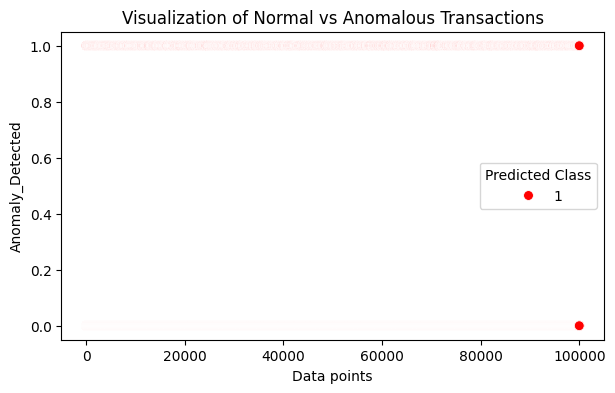

In [34]:
# Selecting the feature for y-axis
y_feature = y    # change the feature name to visualize another

# Adding the predicted labels to the original dataset
df['Anomaly_Detected'] = y_pred

# Plotting the graph
plt.figure(figsize=(7, 4))

sns.scatterplot(x=df.index, y=y_feature, hue=df['Anomaly_Detected'], palette={0: 'blue', 1: 'red'}, s=50)
plt.title('Visualization of Normal vs Anomalous Transactions')
plt.xlabel('Data points')
plt.ylabel(y_feature.name)
plt.legend(title='Predicted Class', loc='best')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [6]:
conn  = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Madesh6554@12',
    database = 'satellite_data'
)

In [7]:
q = "SELECT * FROM telemetry"
df = pd.read_sql(q, conn)

C:\Users\mades\AppData\Local\Temp\ipykernel_22060\4201671037.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(q, conn)


In [8]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Battery Health Status,Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),Solar Panel Temperature (C),Radiator Temperature (C),Radiator Efficiency (%),Thermal Gradient,Satellite Position (km),Satellite Velocity (km/s),Gyroscope Readings (rad/s),Magnetometer Wheel Speed (RPM),Reaction Wheel Speed (RPM),Thruster Firing Status (1/0),Signal Strength (dB),Data Transmission Rate (Mbps),Antenna Status,Packet Loss (%),Payload Power Consumption (W),Sensor Data Rate (Mbps),Camera/Image Sensor Temp (C),Spectral Sensor Health,Payload Data Quality,Error Flags (0/1),Health Status,Event Logs,Star Sensor Data,Horizon Sensor Data,Latency (ms),Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1)
0,2025-01-01 00:00:00,3.74967,3.01530,87.8092,Good,17.2004,8.03543,94.5121,39.3698,30.4787,28.6112,56.7641,20.2267,90.8459,4.92964,2571.6000,2.701490,-0.024961,4608.79,4888.1800,0,-44.3337,61.4198,Deployed,4.019010,23.8521,151.2950,37.0428,Good,86.31871138920351,0,Nominal,Normal operation,-0.7390990655070651,-2.812456272176002,203.8870,0.035491,0,0,97.3758,153.0250,107.6450,0,0,0,0
1,2025-01-01 00:01:00,3.68617,1.92232,79.5289,Degraded,21.0956,4.85190,89.2167,41.7975,24.6694,30.8049,55.1975,15.3364,89.3925,4.33407,63.1182,6.452860,-0.017884,3117.93,751.8380,0,-48.5595,89.3182,Deployed,0.767518,29.7635,189.9890,32.6149,Good,80.34831758664768,0,Nominal,Normal operation,3.658620262119717,3.186518202466516,128.0420,0.038446,0,0,97.1106,18.8142,313.1810,0,0,0,0
2,2025-01-01 00:02:00,3.76477,2.78772,73.3523,Good,19.7585,3.26824,94.1887,56.8323,22.8180,30.5426,55.0257,11.4032,95.7831,6.31986,-3351.1000,4.805800,-0.027229,4275.94,5896.9600,0,-40.5095,45.4504,Deployed,0.889663,22.0345,138.3060,35.7035,Good,92.74407618016389,0,Nominal,Normal operation,-1.7753193929607505,-1.5437525326782475,67.8814,0.045371,0,0,95.3985,-128.8730,443.7480,0,0,0,0
3,2025-01-01 00:03:00,3.85230,2.19038,73.0568,Good,19.4335,5.51504,84.4622,54.1790,23.9180,32.6544,48.1287,14.7920,91.0004,5.14350,519.8480,0.321954,0.003639,2785.96,663.8180,0,-36.7600,47.0395,Deployed,0.949604,28.5226,59.6478,31.7512,Good,95.8563859127319,1,Nominal,Fault detected,-0.3024115711558464,1.520708023375974,60.9995,0.014337,0,0,90.5745,-163.5730,373.2480,0,0,0,0
4,2025-01-01 00:04:00,3.67658,2.33630,78.2867,Good,21.5351,4.93626,91.1533,54.2246,29.3191,30.0415,53.3965,16.2495,94.3231,3.52186,1996.0400,-1.745420,0.017916,4279.23,4699.0000,0,-45.3656,47.5552,Deployed,1.615980,29.1070,163.7200,37.5718,Good,85.25603663603077,0,Nominal,Normal operation,2.3211197056336417,-1.7182637292249647,49.0195,0.025834,0,0,96.9737,23.5006,349.4250,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-03-11 10:35:00,3.67748,1.86773,77.8384,Good,18.8911,6.33362,94.7382,51.1064,24.5232,24.9919,51.6662,15.8660,88.2523,5.72562,-3444.7000,-7.427670,0.031776,2208.93,74.1427,0,-45.2341,82.5607,Deployed,2.342580,30.3899,170.6210,41.2869,Good,83.04838665507752,0,Nominal,Normal operation,4.526421012090253,-1.8290718277900564,181.9600,0.021296,0,0,97.8891,-16.4053,96.3749,0,0,0,0
99996,2025-03-11 10:36:00,3.64302,2.78283,76.5627,Good,15.3672,4.89024,83.5542,42.1585,23.8131,39.4215,63.3270,15.2035,83.9359,3.33460,-6816.4600,-6.145940,-0.040303,3116.21,3112.8100,0,-49.3348,94.5955,Deployed,2.549780,28.0568,99.4458,38.3315,Good,82.18750969669846,0,Nominal,Normal operation,0.6931117634413066,2.945850518774372,62.0996,0.025370,0,0,96.0837,-110.1380,431.6320,0,1,0,0
99997,2025-03-11 10:37:00,3.74092,2.58001,76.6018,Good,21.6631,4.75631,

In [9]:
df.isna().sum()

Timestamp                               0
Battery Voltage (V)                     0
Battery Current (A)                     0
State of Charge (%)                     0
Battery Health Status                   0
Solar Panel Voltage (V)                 0
Solar Panel Current (A)                 0
Solar Panel Efficiency (%)              0
Power Consumption (W)                   0
Internal Temperature (C)                0
Battery Temperature (C)                 0
Solar Panel Temperature (C)             0
Radiator Temperature (C)                0
Radiator Efficiency (%)                 0
Thermal Gradient                        0
Satellite Position (km)                 0
Satellite Velocity (km/s)               0
Gyroscope Readings (rad/s)              0
Magnetometer Wheel Speed (RPM)          0
Reaction Wheel Speed (RPM)              0
Thruster Firing Status (1/0)            0
Signal Strength (dB)                    0
Data Transmission Rate (Mbps)           0
Antenna Status                    

In [11]:
n_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[n_cols]
df_numeric.shape

(100000, 37)

In [12]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_numeric)

In [13]:
df_scaler

array([[ 0.49528692,  1.03071734,  1.56358716, ..., -0.14296643,
        -0.10045301, -0.13920626],
       [-0.13914145, -1.15757463, -0.09272581, ..., -0.14296643,
        -0.10045301, -0.13920626],
       [ 0.64615099,  0.57507178, -1.32823451, ..., -0.14296643,
        -0.10045301, -0.13920626],
       ...,
       [ 0.40786569,  0.15920861, -0.67823524, ..., -0.14296643,
        -0.10045301, -0.13920626],
       [-0.21187592,  0.85561073, -1.07075519, ..., -0.14296643,
        -0.10045301,  7.18358495],
       [ 0.11902594, -1.06705817, -0.35638608, ..., -0.14296643,
        -0.10045301, -0.13920626]])

In [14]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df_scaler)

In [21]:
df['anomaly_score'].value_counts()


anomaly_score
 1    95000
-1     5000
Name: count, dtype: int64

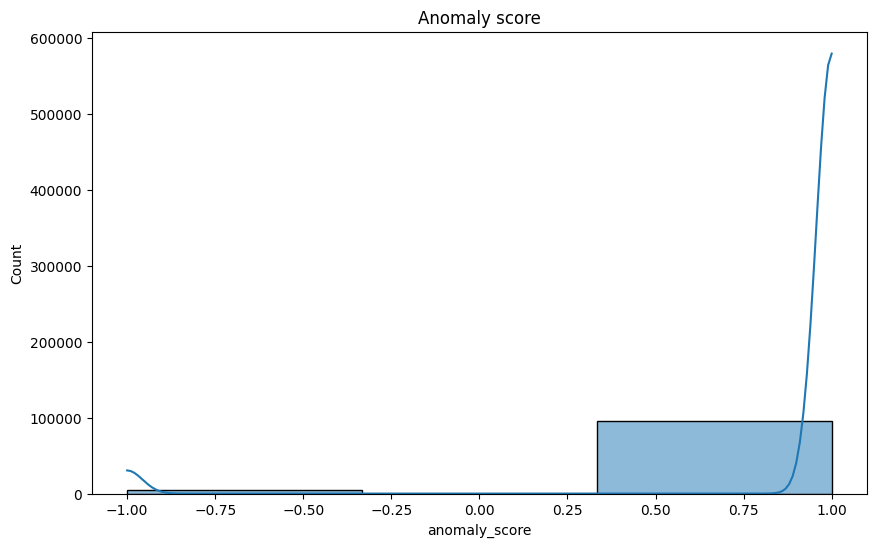

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['anomaly_score'], bins=3,kde=True)
plt.title('Anomaly score')
plt.show()

In [25]:
num_anomalies = (df["anomaly_score"] == -1).sum()
num_anomalies

5000

In [27]:
anomalies = df[df['anomaly_score'] == -1]
anomalies.shape


(5000, 47)

       anomaly_score
66740      -0.102116
32442      -0.097296
53862      -0.087635
27871      -0.086622
53861      -0.084309
84330      -0.083900
50517      -0.083772
87860      -0.081591
59519      -0.080100
67380      -0.079977


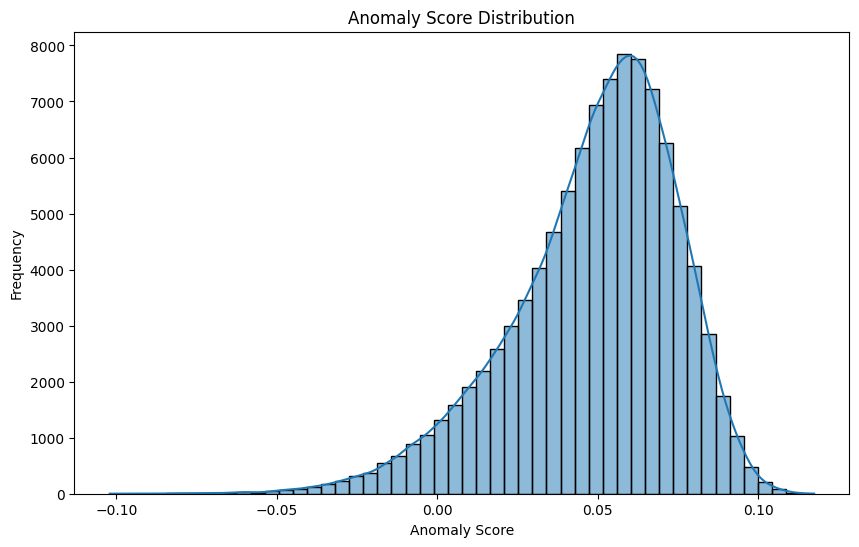

In [29]:
# Get anomaly scores
df["anomaly_score"] = iso_forest.decision_function(df_scaler)

# Display top 10 anomalies with highest anomaly score
print(df[["anomaly_score"]].sort_values(by="anomaly_score").head(10))

# Histogram of anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(df["anomaly_score"], bins=50, kde=True)
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


In [30]:
threshold = np.percentile(df["anomaly_score"], 5)  # Get the 5th percentile
anomalies = df[df["anomaly_score"] < threshold]
print(f"Total detected anomalies: {len(anomalies)}")


Total detected anomalies: 5000


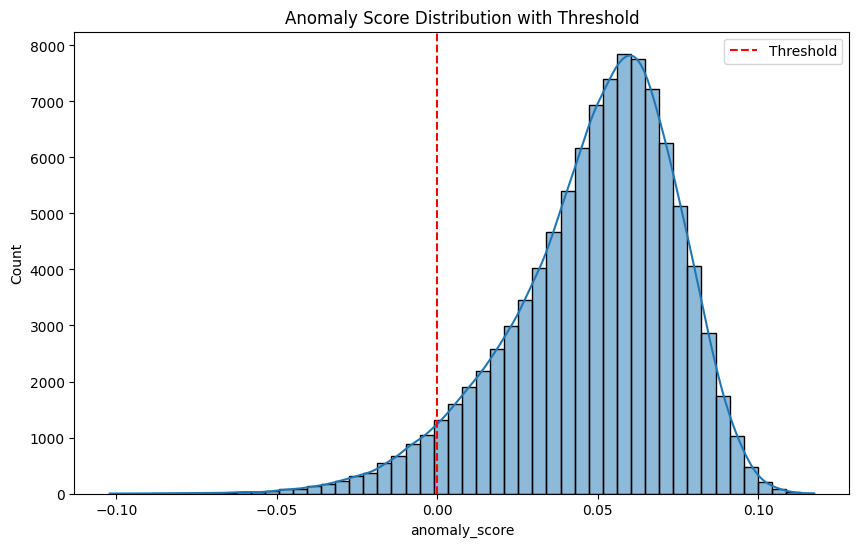

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df["anomaly_score"], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label="Threshold")
plt.title("Anomaly Score Distribution with Threshold")
plt.legend()
plt.show()


In [32]:
anomaly_percentage = (len(anomalies) / len(df)) * 100
print(f"Anomalies detected: {len(anomalies)} ({anomaly_percentage:.2f}%)")


Anomalies detected: 5000 (5.00%)


In [33]:
anomalous_features = anomalies.describe().transpose()
print(anomalous_features)


                                       count                        mean  ...                  max          std
Timestamp                               5000  2025-02-04 18:28:35.448000  ...  2025-03-11 10:38:00          NaN
Battery Voltage (V)                   5000.0                    3.703225  ...              4.14791     0.109091
Battery Current (A)                   5000.0                    2.467025  ...              4.78106     0.565812
State of Charge (%)                   5000.0                   80.099823  ...              99.3911      5.70834
Solar Panel Voltage (V)               5000.0                   20.108763  ...              26.9266     2.376969
Solar Panel Current (A)               5000.0                    5.016453  ...              9.00589     1.145604
Solar Panel Efficiency (%)            5000.0                   87.341966  ...              94.9951     4.561145
Power Consumption (W)                 5000.0                   49.360545  ...              85.7542    11

In [34]:
threshold = np.percentile(df["anomaly_score"], 3)  # Change 3% to 1% or 5% as needed



In [35]:
anomalies = df[df["anomaly_score"] < threshold]
print(anomalies.describe().transpose())


                                       count                        mean  ...                  max          std
Timestamp                               3000  2025-02-04 16:00:52.260000  ...  2025-03-11 10:36:00          NaN
Battery Voltage (V)                   3000.0                    3.704095  ...              4.14791     0.110042
Battery Current (A)                   3000.0                    2.467678  ...              4.35395     0.569859
State of Charge (%)                   3000.0                   79.998008  ...              99.3911      5.65045
Solar Panel Voltage (V)               3000.0                   20.077761  ...              26.9266     2.379214
Solar Panel Current (A)               3000.0                    5.027088  ...              9.00589     1.160332
Solar Panel Efficiency (%)            3000.0                   87.331829  ...              94.9951     4.530877
Power Consumption (W)                 3000.0                   49.194587  ...              85.7542    11

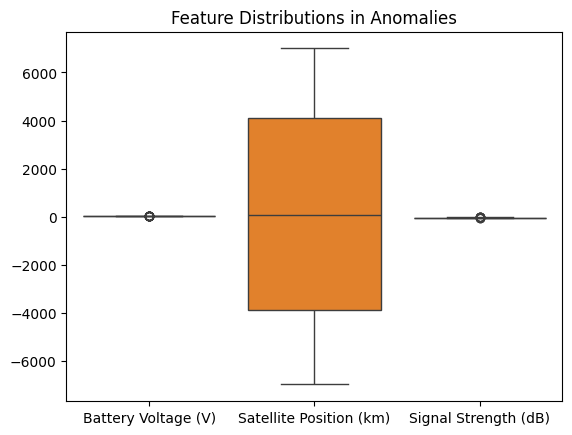

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=anomalies[["Battery Voltage (V)", "Satellite Position (km)", "Signal Strength (dB)"]])
plt.title("Feature Distributions in Anomalies")
plt.show()


In [37]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Battery Health Status,Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),Solar Panel Temperature (C),Radiator Temperature (C),Radiator Efficiency (%),Thermal Gradient,Satellite Position (km),Satellite Velocity (km/s),Gyroscope Readings (rad/s),Magnetometer Wheel Speed (RPM),Reaction Wheel Speed (RPM),Thruster Firing Status (1/0),Signal Strength (dB),Data Transmission Rate (Mbps),Antenna Status,Packet Loss (%),Payload Power Consumption (W),Sensor Data Rate (Mbps),Camera/Image Sensor Temp (C),Spectral Sensor Health,Payload Data Quality,Error Flags (0/1),Health Status,Event Logs,Star Sensor Data,Horizon Sensor Data,Latency (ms),Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),anomaly_score
0,2025-01-01 00:00:00,3.74967,3.01530,87.8092,Good,17.2004,8.03543,94.5121,39.3698,30.4787,28.6112,56.7641,20.2267,90.8459,4.92964,2571.6000,2.701490,-0.024961,4608.79,4888.1800,0,-44.3337,61.4198,Deployed,4.019010,23.8521,151.2950,37.0428,Good,86.31871138920351,0,Nominal,Normal operation,-0.7390990655070651,-2.812456272176002,203.8870,0.035491,0,0,97.3758,153.0250,107.6450,0,0,0,0,0.010615
1,2025-01-01 00:01:00,3.68617,1.92232,79.5289,Degraded,21.0956,4.85190,89.2167,41.7975,24.6694,30.8049,55.1975,15.3364,89.3925,4.33407,63.1182,6.452860,-0.017884,3117.93,751.8380,0,-48.5595,89.3182,Deployed,0.767518,29.7635,189.9890,32.6149,Good,80.34831758664768,0,Nominal,Normal operation,3.658620262119717,3.186518202466516,128.0420,0.038446,0,0,97.1106,18.8142,313.1810,0,0,0,0,0.072633
2,2025-01-01 00:02:00,3.76477,2.78772,73.3523,Good,19.7585,3.26824,94.1887,56.8323,22.8180,30.5426,55.0257,11.4032,95.7831,6.31986,-3351.1000,4.805800,-0.027229,4275.94,5896.9600,0,-40.5095,45.4504,Deployed,0.889663,22.0345,138.3060,35.7035,Good,92.74407618016389,0,Nominal,Normal operation,-1.7753193929607505,-1.5437525326782475,67.8814,0.045371,0,0,95.3985,-128.8730,443.7480,0,0,0,0,0.029124
3,2025-01-01 00:03:00,3.85230,2.19038,73.0568,Good,19.4335,5.51504,84.4622,54.1790,23.9180,32.6544,48.1287,14.7920,91.0004,5.14350,519.8480,0.321954,0.003639,2785.96,663.8180,0,-36.7600,47.0395,Deployed,0.949604,28.5226,59.6478,31.7512,Good,95.8563859127319,1,Nominal,Fault detected,-0.3024115711558464,1.520708023375974,60.9995,0.014337,0,0,90.5745,-163.5730,373.2480,0,0,0,0,0.032547
4,2025-01-01 00:04:00,3.67658,2.33630,78.2867,Good,21.5351,4.93626,91.1533,54.2246,29.3191,30.0415,53.3965,16.2495,94.3231,3.52186,1996.0400,-1.745420,0.017916,4279.23,4699.0000,0,-45.3656,47.5552,Deployed,1.615980,29.1070,163.7200,37.5718,Good,85.25603663603077,0,Nominal,Normal operation,2.3211197056336417,-1.7182637292249647,49.0195,0.025834,0,0,96.9737,23.5006,349.4250,0,0,0,0,0.082911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-03-11 10:35:00,3.67748,1.86773,77.8384,Good,18.8911,6.33362,94.7382,51.1064,24.5232,24.9919,51.6662,15.8660,88.2523,5.72562,-3444.7000,-7.427670,0.031776,2208.93,74.1427,0,-45.2341,82.5607,Deployed,2.342580,30.3899,170.6210,41.2869,Good,83.04838665507752,0,Nominal,Normal operation,4.526421012090253,-1.8290718277900564,181.9600,0.021296,0,0,97.8891,-16.4053,96.3749,0,0,0,0,0.057264
99996,2025-03-11 10:36:00,3.64302,2.78283,76.5627,Good,15.3672,4.89024,83.5542,42.1585,23.8131,39.4215,63.3270,15.2035,83.9359,3.33460,-6816.4600,-6.145940,-0.040303,3116.21,3112.8100,0,-49.3348,94.5955,Deployed,2.549780,28.0568,99.4458,38.3315,Good,82.18750969669846,0,Nominal,Normal operation,0.6931117634413066,2.945850518774372,62.0996,0.025370,0,0,96.0837,-110.1380,431.6320,0,1,0,0

C:\Users\mades\AppData\Local\Temp\ipykernel_22060\2631304968.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(q, conn)


Anomalies detected: 1493 (3.00%)


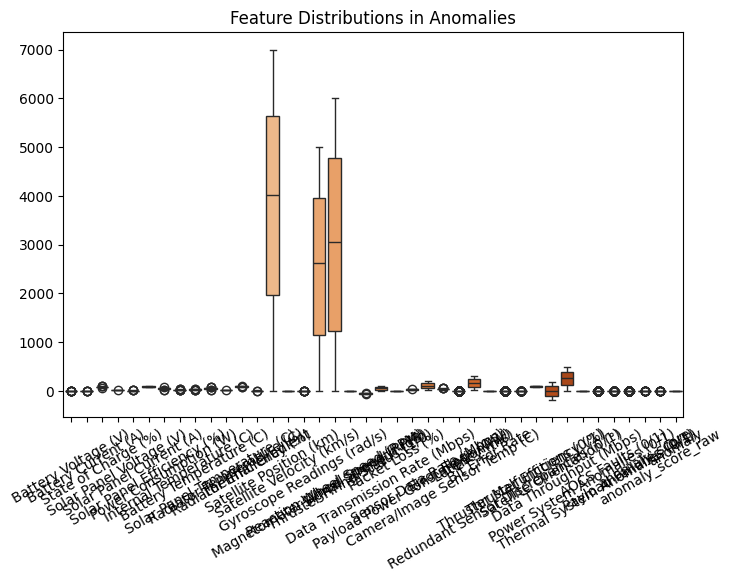

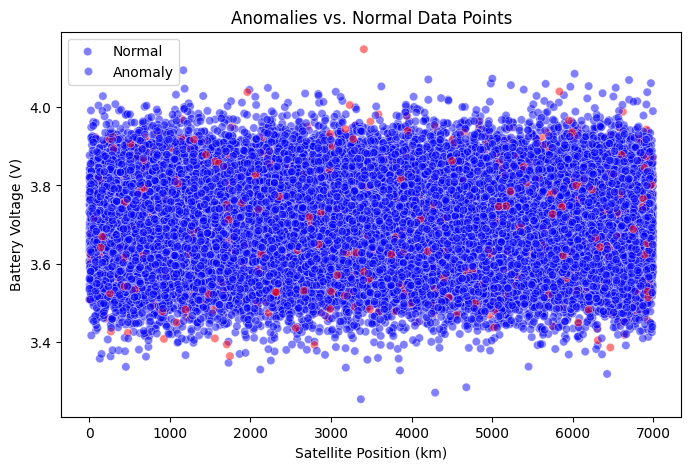

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler


df = pd.read_sql(q, conn)
# Drop non-numeric columns if any
ddf_numeric = df.select_dtypes(include=[np.number]).copy()

# ✅ Handle missing values (Fill or drop)
df_numeric = df_numeric.dropna()

# ✅ Remove invalid negative values for "Satellite Position (km)" (if applicable)
df_numeric = df_numeric[df_numeric["Satellite Position (km)"] >= 0]

# ✅ Normalize data (Scaling helps Isolation Forest work better)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# ✅ Train Isolation Forest
iso_forest = IsolationForest(contamination=0.03, random_state=42)  # Adjust contamination level
df_scaled["anomaly_score"] = iso_forest.fit_predict(df_scaled)

# ✅ Add anomaly scores to the original dataset
df_numeric["anomaly_score"] = df_scaled["anomaly_score"]
df_numeric["anomaly_score_raw"] = iso_forest.decision_function(df_scaled)

# ✅ Set threshold and mark anomalies
threshold = np.percentile(df_numeric["anomaly_score_raw"], 3)
df_numeric["anomaly"] = df_numeric["anomaly_score_raw"] < threshold

# ✅ Count anomalies
num_anomalies = df_numeric["anomaly"].sum()
total_points = len(df_numeric)
print(f"Anomalies detected: {num_anomalies} ({(num_anomalies / total_points) * 100:.2f}%)")

# ✅ Visualization - Box Plot for Anomalies
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_numeric[df_numeric["anomaly"] == True], palette="Oranges")
plt.xticks(rotation=30)
plt.title("Feature Distributions in Anomalies")
plt.show()

# ✅ Scatter Plot - Anomalies vs. Normal Points
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_numeric["Satellite Position (km)"], 
    y=df_numeric["Battery Voltage (V)"], 
    hue=df_numeric["anomaly"], 
    palette={False: "blue", True: "red"}, 
    alpha=0.5
)
plt.xlabel("Satellite Position (km)")
plt.ylabel("Battery Voltage (V)")
plt.title("Anomalies vs. Normal Data Points")
plt.legend(["Normal", "Anomaly"])
plt.show()

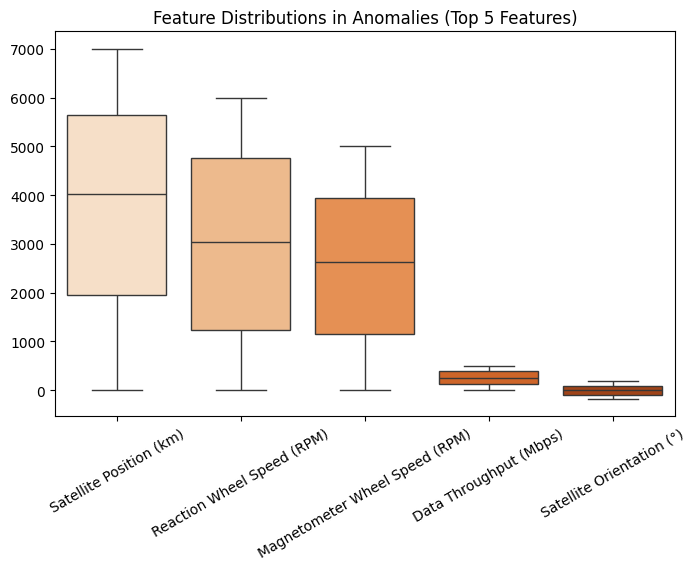

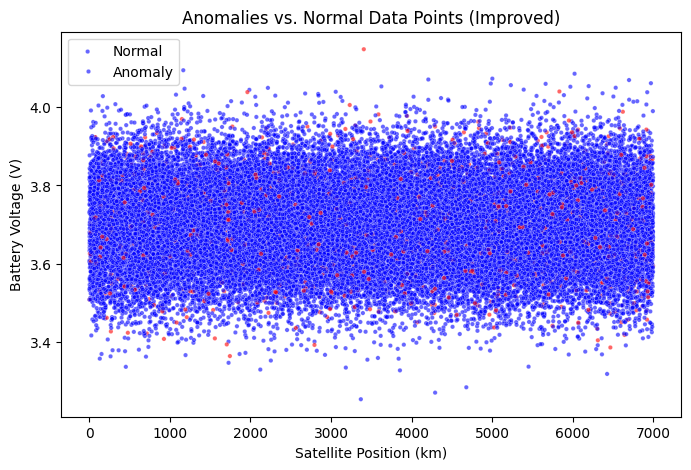

In [43]:
# Select top features by variance (use top 5)
top_features = df_numeric.var().sort_values(ascending=False).head(5).index.tolist()

# ✅ Improved Box Plot (Only Top Features)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_numeric[df_numeric["anomaly"] == True][top_features], palette="Oranges")
plt.xticks(rotation=30)
plt.title("Feature Distributions in Anomalies (Top 5 Features)")
plt.show()

# ✅ Improved Scatter Plot with Better Visibility
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df_numeric["Satellite Position (km)"], 
    y=df_numeric["Battery Voltage (V)"], 
    hue=df_numeric["anomaly"], 
    palette={False: "blue", True: "red"}, 
    alpha=0.6, 
    s=10  # Increase size of anomaly points
)
plt.xlabel("Satellite Position (km)")
plt.ylabel("Battery Voltage (V)")
plt.title("Anomalies vs. Normal Data Points (Improved)")
plt.legend(["Normal", "Anomaly"])
plt.show()


In [45]:
df.columns

Index(['Timestamp', 'Battery Voltage (V)', 'Battery Current (A)',
       'State of Charge (%)', 'Battery Health Status',
       'Solar Panel Voltage (V)', 'Solar Panel Current (A)',
       'Solar Panel Efficiency (%)', 'Power Consumption (W)',
       'Internal Temperature (C)', 'Battery Temperature (C)',
       'Solar Panel Temperature (C)', 'Radiator Temperature (C)',
       'Radiator Efficiency (%)', 'Thermal Gradient',
       'Satellite Position (km)', 'Satellite Velocity (km/s)',
       'Gyroscope Readings (rad/s)', 'Magnetometer Wheel Speed (RPM)',
       'Reaction Wheel Speed (RPM)', 'Thruster Firing Status (1/0)',
       'Signal Strength (dB)', 'Data Transmission Rate (Mbps)',
       'Antenna Status', 'Packet Loss (%)', 'Payload Power Consumption (W)',
       'Sensor Data Rate (Mbps)', 'Camera/Image Sensor Temp (C)',
       'Spectral Sensor Health', 'Payload Data Quality', 'Error Flags (0/1)',
       'Health Status', 'Event Logs', 'Star Sensor Data',
       'Horizon Sensor Data'

## new dataset

C:\Users\mades\AppData\Local\Temp\ipykernel_22060\3802770567.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.median(), inplace=True)


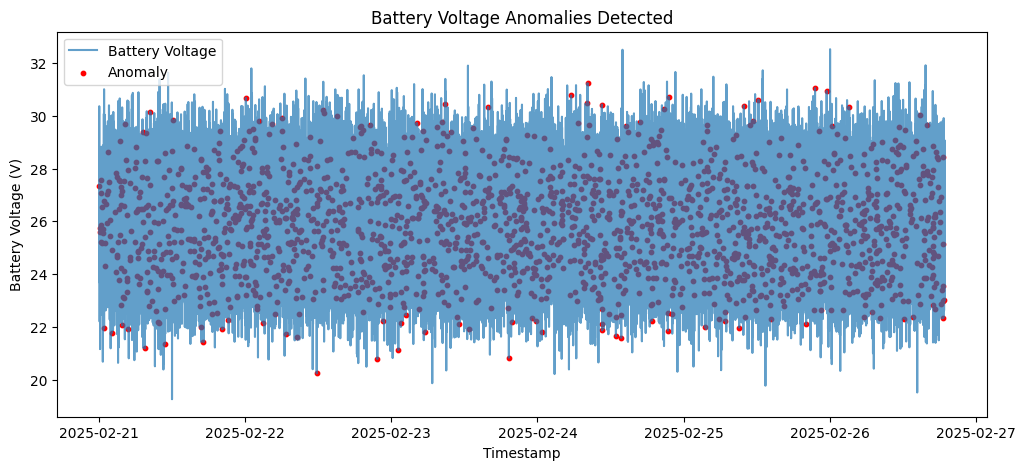

Anomaly detection complete! Results saved.


In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the Dataset
file_path = r"C:\Users\mades\Downloads\satellite_telemetry_data.csv"  # Update the path if needed
df = pd.read_csv(file_path, parse_dates=["Timestamp"])

# Step 2: Select Relevant Features for Anomaly Detection
features = [
    "Battery Voltage (V)", "Battery Current (A)", "State of Charge (%)", 
    "Solar Panel Voltage (V)", "Solar Panel Current (A)", "Solar Panel Efficiency (%)",
    "Power Consumption (W)", "Internal Temperature (C)", "Battery Temperature (C)", 
    "Thruster Firing Status (1/0)", "Signal Strength (dB)", "Data Transmission Rate (Mbps)", 
    "Packet Loss (%)", "Payload Power Consumption (W)", "Latency (ms)"
]

df_selected = df[features]

# Step 3: Handle Missing Values (if any)
df_selected.fillna(df_selected.median(), inplace=True)
scaler = MinMaxScaler()
df_selected_scaled = scaler.fit_transform(df_selected)

# Step 4: Train the Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)  # Detect ~5% anomalies
df["Anomaly_Score"] = model.fit_predict(df_selected_scaled)

# Step 5: Add Anomaly Labels (1 = Normal, -1 = Anomaly)
df["Anomaly"] = df["Anomaly_Score"].apply(lambda x: "Normal" if x == 1 else "Anomaly")

# Step 6: Visualize Anomalies (Example: Battery Voltage)
plt.figure(figsize=(12, 5))
plt.plot(df["Timestamp"], df["Battery Voltage (V)"], label="Battery Voltage", alpha=0.7)
plt.scatter(df[df["Anomaly"] == "Anomaly"]["Timestamp"], 
            df[df["Anomaly"] == "Anomaly"]["Battery Voltage (V)"], 
            color="red", label="Anomaly", s=10)
plt.xlabel("Timestamp")
plt.ylabel("Battery Voltage (V)")
plt.title("Battery Voltage Anomalies Detected")
plt.legend()
plt.show()

# Step 7: Save the Results
df.to_csv("satellite_telemetry_with_anomalies.csv", index=False)
print("Anomaly detection complete! Results saved.")


In [47]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),Solar Panel Temperature (C),Radiator Temperature (C),Radiator Efficiency (%),Thermal Gradient,Satellite Position (km),Satellite Velocity (km/s),Gyroscope Readings (rad/s),Magnetometer Wheel Speed (RPM),Reaction Wheel Speed (RPM),Thruster Firing Status (1/0),Signal Strength (dB),Data Transmission Rate (Mbps),Packet Loss (%),Payload Power Consumption (W),Sensor Data Rate (Mbps),Camera/Image Sensor Temp (C),Spectral Sensor Health,Payload Data Quality,Error Flags (0/1),Latency (ms),Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly_Score,Anomaly
0,2025-02-21 00:00:00,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,31.265584,18.490880,72.170633,3.285013,506.434421,8.166476,0.105102,265.568801,1270.645970,0,-101.486384,42.664469,2.719768,124.540779,6.979536,37.800737,Healthy,90.067956,0,65.692509,0.002098,0,0,95.550449,85.803526,72.383849,0,0,0,0,1,Normal
1,2025-02-21 00:00:05,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,29.035849,22.774232,71.515772,5.656480,873.467439,8.137724,-0.093411,255.557184,1196.578713,0,-107.178185,42.647379,3.462402,130.149868,6.545813,43.072857,Healthy,91.759489,0,19.186613,0.009207,0,0,99.384409,277.466628,19.009831,0,0,0,0,1,Normal
2,2025-02-21 00:00:10,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,22.684533,15.536924,74.818031,3.217874,602.553203,7.723365,0.007758,390.014896,1940.706143,0,-83.495941,27.632407,1.121497,170.112278,13.288995,33.437338,Healthy,81.835889,0,54.539970,0.001557,0,0,93.026799,348.796261,81.056144,0,0,0,0,1,Normal
3,2025-02-21 00:00:15,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,44.812171,17.518394,52.147176,11.545985,737.048866,7.737698,-0.039808,481.684603,561.170959,0,-84.245120,6.745082,0.776054,77.927756,10.092093,36.022035,Healthy,96.081310,0,24.132266,0.008302,0,0,97.763768,107.071250,91.198533,0,0,0,0,1,Normal
4,2025-02-21 00:00:20,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,29.056744,9.634914,50.473260,3.818374,505.098808,7.860604,-0.069136,308.716348,1839.739298,0,-112.124792,23.313521,4.987886,143.143645,6.940646,28.686482,Healthy,96.387717,0,26.293064,0.003185,0,0,93.447386,160.991069,52.074967,0,0,0,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-02-26 18:52:55,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,36.801562,28.116230,67.896240,4.732966,502.033900,7.919253,-0.147488,301.342870,1831.102598,0,-99.573245,48.790871,3.566732,173.814633,13.359857,39.728186,Healthy,98.497124,0,60.085909,0.001415,0,0,89.712973,82.567854,54.518194,0,0,0,0,1,Normal
99996,2025-02-26 18:53:00,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,30.358950,17.072770,54.102384,5.198357,700.087920,7.891845,-0.017628,115.104616,1806.498751,0,-116.749332,23.977325,2.193554,188.066164,14.732828,39.208052,Healthy,81.358013,0,48.809890,0.000842,0,0,81.622488,99.944938,15.539072,0,0,0,0,1,Normal
99997,2025-02-26 18:53:05,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,51.847639,16.628743,66.949901,4.339077,928.485527,7.714109,-0.032402,402.992163,963.026153,0,-87.967767,41.690177,0.186477,96.210003,6.186673,35.478929,Healthy,89.040438,0,84.550403,0.002103,0,0,94.950784,158.219524,13.588880,0,0,0,

2025-03-04 10:16:22.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:22.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.085 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-04 10:16:24.087 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [53]:
!streamlit run app2.py

^C


In [74]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")
# Drop non-numeric columns (if Timestamp exists, drop it)
df = df.drop(columns=['Timestamp'], errors='ignore')


label_encoder = LabelEncoder()
df['Spectral Sensor Health'] = label_encoder.fit_transform(df['Spectral Sensor Health'])  
# Define features (exclude 'Anomaly' column if it exists)
features = [col for col in df.columns if col not in ['Anomaly']]
X = df[features]

# Train Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=33)
model.fit(X)

# Predict Anomalies
df['Predicted_Anomaly'] = model.predict(X)  # Output: -1 = Anomaly, 1 = Normal
df['Predicted_Anomaly'] = df['Predicted_Anomaly'].map({1: 0, -1: 1})  # Convert to 0/1

# Display Results
# print(df[['Anomaly', 'Predicted_Anomaly']].head(20))

# Save predictions
# df.to_csv("predictions.csv", index=False)


In [78]:
import joblib

# Save the trained Isolation Forest model
joblib.dump(model, "anomaly_model.pkl")

print("✅ Model saved successfully as 'anomaly_model.pkl'")


✅ Model saved successfully as 'anomaly_model.pkl'


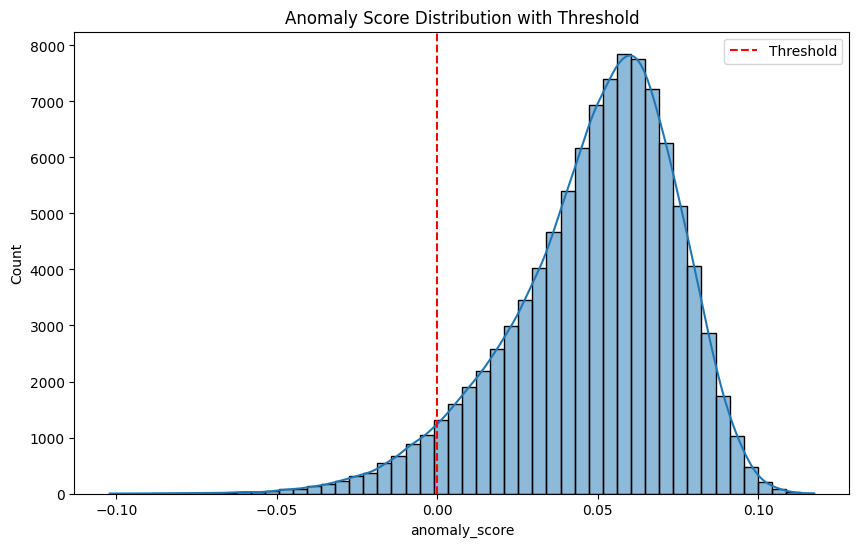

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df["anomaly_score"], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label="Threshold")
plt.title("Anomaly Score Distribution with Threshold")
plt.legend()
plt.show()


In [75]:
df['Predicted_Anomaly'].value_counts()

Predicted_Anomaly
0    95000
1     5000
Name: count, dtype: int64

In [67]:
df.columns

Index(['Battery Voltage (V)', 'Battery Current (A)', 'State of Charge (%)',
       'Solar Panel Voltage (V)', 'Solar Panel Current (A)',
       'Solar Panel Efficiency (%)', 'Power Consumption (W)',
       'Internal Temperature (C)', 'Battery Temperature (C)',
       'Solar Panel Temperature (C)', 'Radiator Temperature (C)',
       'Radiator Efficiency (%)', 'Thermal Gradient',
       'Satellite Position (km)', 'Satellite Velocity (km/s)',
       'Gyroscope Readings (rad/s)', 'Magnetometer Wheel Speed (RPM)',
       'Reaction Wheel Speed (RPM)', 'Thruster Firing Status (1/0)',
       'Signal Strength (dB)', 'Data Transmission Rate (Mbps)',
       'Packet Loss (%)', 'Payload Power Consumption (W)',
       'Sensor Data Rate (Mbps)', 'Camera/Image Sensor Temp (C)',
       'Spectral Sensor Health', 'Payload Data Quality', 'Error Flags (0/1)',
       'Latency (ms)', 'Bit Error Rate',
       'Redundant Sensor Discrepancies (0/1)', 'Thruster Malfunctions (0/1)',
       'Thruster Efficiency (%

In [79]:
!streamlit run app3.py

^C
